<a href="https://colab.research.google.com/github/poorvi56/sc_fair_2018/blob/master/sc_fair_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 - Exploratory Data Analysis and Regression


##Introduction

Welcome to **Lab 1**! This first of five labs we will cover in the course Machine Learning and Deep Learning Fundamentals with Python. The labs are intended to give you a chance to put to use some of the teachings in the course lecture as well as introduce you to some concepts that are extensions of topics we won't have enough time to cover. Constrained to two days, we cannot cover all the topics in Machine Learning and Deep Learning but if you decide to pursue further education and exploration, the Internet is a vast resource of information.

**Lab 1** will cover two topics from our lecture: Exploratory Data Analysis, or EDA, and Regression. We will be using Google's Colaboratory (that's what you're looking at right now) for running code which is an online version of [Jupyter Notebooks](http://jupyter.org/), one of the most widely used reporting tools for data science and analytical projects today. Jupyter allows analysts to mix text with [Python](https://www.python.org/) code and display visualizations all in one spot.

##Brief Overview of Collaboratory

As you can see, Colaboratory allows us to type text and code on the left and display the result on the right. Within the text, you can see what we call *Markdown* -- things like the pound sign and asterisk that makes text ##headers, **bold text**, and *italicized* text. [Here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) is a good resource for other things you can do with Markdown.

Colaboratory allows you to save notebooks like this one on Google Drive for cloud storage as well as colaboration (hence the name, I suspect). Notebooks are run in the background on virtual machines with Jupyter, Python, and several common Python packages pre-installed (you can install other packages if needed). Additionally, when we need to pack on extra firepower for running Deep Learning models, Colaboratory allows us to use Graphics Processing Units, or GPUs, which can substantially speed up processing.

Here are a few shortcuts before we get started:

*   Use the "+ Code" button in the top left corner to add another block like this one only for running **code** or the "+ text" button for adding a block that runs **text**
*   I suggest looking at "Tools-->Keyboard Shortcuts..." for additional ways to run Colaboratory but here are a few useful ones:
> **Ctrl+F9** - Run all blocks   
> **Ctrl+Enter** - Run selected block   
> **Alt+Enter** - Run block and add a new block beneath   
> **Shift+Enter** - Run block and select next block   
> **Ctrl+F8** - Run all blocks before selected block   
> **Ctrl+F10** - Run selected block and all following blocks   
> **Ctrl+M+Y** - Convert selected block to a *code* block   
> **Ctrl+M+M** - Convert selected block to a *text* block

Also useful, Colaboratory supports code completion. Start typing code and press the **Tab** key. A drop down will appear with code based on what you typed. If only one possible command exists, it should complete it for you automatically. You may also set your cursor inside the parenthesis of a function, press **Tab**, and get notes about that function, its arguments, and sometimes example code. Even better yet, if there is an error produced by your code, Colaboratory will provide a button at the bottom of the code output to search StackOverflow for an answer!

**NOTE:** In order to have the code run correctly, you'll need to execute each code block in order by clicking on the "Play Button" on the left-hand side of each block!


##Exploratory Data Analysis (EDA)

Remember from the lecture that most of a data scientist/ML engineer's time is spent cleaning and preparing data for modeling. Data is inheriently messy and if it isn't cleaned properly, our models will not produce valid estimates.

In the lecture it was mentioned that one framework for EDA is **Exploration, Preparation, and Analyzation**:

* **Exploration** - What does our data set *look* like? How many observations and features? Missing values? What data types? Etc.
* **Preparation** - What do we need to do to clean it up and make it *tidy*?
* **Analyzation** - What *statistics* and *relationships* describe our data that might be useful to future modeling? Are there outliers? What assumptions can we make about our data and the models that might work best to solve our problem? 

We will start by using the **Boston Housing Prices** data set which is commonly used in ML research for both EDA and linear regression. You can upload the file from your local computer. Here is an overview of the packages we will be using:

* **[scikit-learn](http://scikit-learn.org/stable/)** - One of the most popular Python packages for ML models. It provides tools for modeling classification, regression, and clustering problems as well as tools for model selection and data preprocessing.
* **[NumPy](http://www.numpy.org/)** - This package is also one of the most popular and widely applicable in ML. It provides tools for performing quick linear algebra operations seen in many ML model training algorithms. It's based on C which makes it very fast.
* **[Pandas](http://pandas.pydata.org/)** - Pandas allows us to work with data in *data frames* which are the ideal structure for ML data sets -- just like everyone's "favorite," Excel! Pandas has tools for manipulating data frames in many useful ways.
* **[Matplotlib](https://matplotlib.org/)** - A package for data visualizations.
* **[Seaborn](https://seaborn.pydata.org/)** - Another package for data visualizations built on Matplotlib.

Let's get started and load the data!





In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [0]:
#Install packages not native to Colaboratory
!pip -q install graphviz
!pip -q install pydot
import pydot

In [0]:
#Load our packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn import datasets
%matplotlib inline 

When you run the cell below, you will be prompted to open a file. Please select the file **"HousingData.csv"**

In [0]:
#Upload the file from your local computer and save it in the Jupyter environment
files.upload()

In [0]:
#What are the dimensions of our data frame (row, column)?
raw = pd.read_csv('test.csv')
raw.shape

(31, 5)

We can see that our data set has 506 observations and 14 features. Let's take a snapshot look at the first 15 rows of data:

In [0]:
#Look at first 15 rows
raw.head(15)

,TIME,HUMIDITY,TEMPERATURE,ECO2,TCOV
0,02:00:09,99.900002,67.280001,680,0
1,02:00:10,99.900002,67.280001,698,0
2,02:00:12,99.900002,67.280001,690,0
3,02:00:14,99.900002,67.280001,677,0
4,02:00:15,99.900002,67.280001,692,0
5,02:00:19,99.900002,67.280001,680,0
6,02:00:21,99.900002,67.280001,687,0
7,02:00:23,99.900002,67.280001,673,0
8,02:00:24,99.900002,67.280001,671,0
9,02:00:26,99.900002,67.280001,655,0


We can already see that our data has missing values in some of the features (NaN). What exactly *are* each of these features though? Part of EDA is understanding what we are working with. We can use the info [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) to gain more knowledge of the data set. So please note that each observation is an average measure of homes in a US Census Tract in the Boston area.

It looks like this data set is typically used for regression modeling. After we do some cleaning we will try and use the 13 features to predict the 14th, **MEDV** -- the median home price in $1,000s (you can tell that this data set is fairly old with these prices!).

By running the **raw.shape** and **raw.head(15)** commands, we've already started our **Exploratory** analysis of EDA. Let's dive deeper and check for two specific issues: missing values and data types.


In [0]:
#Counts of missing values and data type descriptions
print(pd.isnull(raw).sum())
print(raw.dtypes)

TIME           0
HUMIDITY       0
TEMPERATURE    0
ECO2           0
TCOV           0
dtype: int64
TIME            object
HUMIDITY       float64
TEMPERATURE    float64
ECO2             int64
TCOV             int64
dtype: object


These two simple commands allow us to see both the count of missing values in our data set as well as the data type for each column. Why is this important? Missing values can be impactful because:

1. They may indicate something happened during the data collection process that needs to be investigated before future data is collected
2. They may inhibit our ability to build certain models where we require data input from all of our observations

Regarding bullet 1, missing values can be either "missing at random" or "missing *not* at random." The later might indicate a systematic error in our data which would effedctively limit us from moving forward with any model building. We can't model/predict if we can't trust our data. It is the model lifeblood -- the *oil*.

There are a few ways of dealing with missing values:

1. Delete the observation with missing values in features we intended to use for modeling. Based on the number of missing values across the whole data set, this might significantly reduce the size of observations we have to work with and thus weaken our model.

2. Delete the feature with extensive missing values. We aren't going to get much help from a bunch of NULL values in building a model.

3. Impute values. We can use several techniques like replacing missing values with the feature's mean, median, or mode. Imputing it based on the values of *other* features in our data set. We can even use linear or logistic regression to impute continuous and discrete missing values, respectfully.

Regarding our data types, we can see that all of our data is numeric. **"float64"** indicates a continuous value (i.e. can take on decimal places) while **"int64"** indicates discrete numeric values. We don't need to do anything further with this. Data types come in to play when we see things like categorical features saved as **"strings"** rather than ordinal, numeric data or dates saved as **"float64"**. This can impact how ML algorithms treat them or it may make them not work at all.

Back to missing values, it looks like each feature with missing values has 20 of them. This looks suspicious. If individual observations contain all the missing values across features we might just remove them. This may also indicate missing values are *not* at random and we may need to investigate how data is collected further. If the missing values are spread around observations we may just have a "missing at random" case which is more favorable to moving forward.

In [0]:
#View only rows with missing values
mv = raw[raw.isnull().any(axis=1)]
mv

,TIME,HUMIDITY,TEMPERATURE,ECO2,TCOV


It looks like 112 observations contain at least one missing value so we know that there aren't certain cases with all of them. This is favorable. Let's go ahead and replace them then since removing 112 observations would reduce our data set size much more than just 20. Let's be careful though because two of our features are not like the rest: **ZN** and **CHAS**. The **ZN** feature takes on mostly zero values while **CHAS** is binary (0,1). Replacing with the mean would fundamentally alter these.

In [0]:
#Replace subset of columns with column mean
raw[['TIME', "HUMIDITY", "TEMPERATURE",'ECO2', "TCOV"]]
#raw[['CRIM','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']] = raw[['CRIM','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']].fillna(raw.mean())
raw.iloc[mv.index]

,TIME,HUMIDITY,TEMPERATURE,ECO2,TCOV


In [0]:
#Replace subset of columns with column mode
for col in ['HUMIDITY','TEMPERATURE','ECO2']:
    raw[col].fillna(raw[col].mode()[0], inplace=True)

raw.iloc[mv.index]

,TIME,HUMIDITY,TEMPERATURE,ECO2,TCOV


This takes care of all the missing values in our columns. Because Python can be "finicky" at times you can see that replacing missing values with the mode requires different code than when we replace them with the mean. Each command returns a different data type.

So now we've taken care of missing values and explored each feature's data type. What about the "tidiness" of our data? Do we have one feature per column, one observation per row? Yes. Our data set is "tidy!" This completes both the **Exploration** and **Preperation** steps. Let's check statistics and relationships with our **Analyzation** step.





In [0]:
#Check summary statistics
raw.describe()

,HUMIDITY,TEMPERATURE,ECO2,TCOV
count,31.000000,31.000000,31.000000,31.0
mean,99.900002,67.280001,654.483871,0.0
std,0.000000,0.000000,23.387847,0.0
min,99.900002,67.280001,614.000000,0.0
25%,99.900002,67.280001,636.000000,0.0
50%,99.900002,67.280001,655.000000,0.0
75%,99.900002,67.280001,672.000000,0.0
max,99.900002,67.280001,698.000000,0.0


The "describe" command in Pandas allows us to quickly look at summary statistics for our data set. We can verify that all our features contain 506 values and nothing seems particularly out of the ordinary except for the maximum median home value (**MEDV**) is $50,000. This might be nothing -- the data set website mentions the possibility of "censoring the data" but we can't be sure so we'll leave it.

Describe gives us measures of central tendency (mean) and dispursion/distribution (standard deviation, range, percentiles) which are typically what we need in terms of statistics. How about relationships between features?



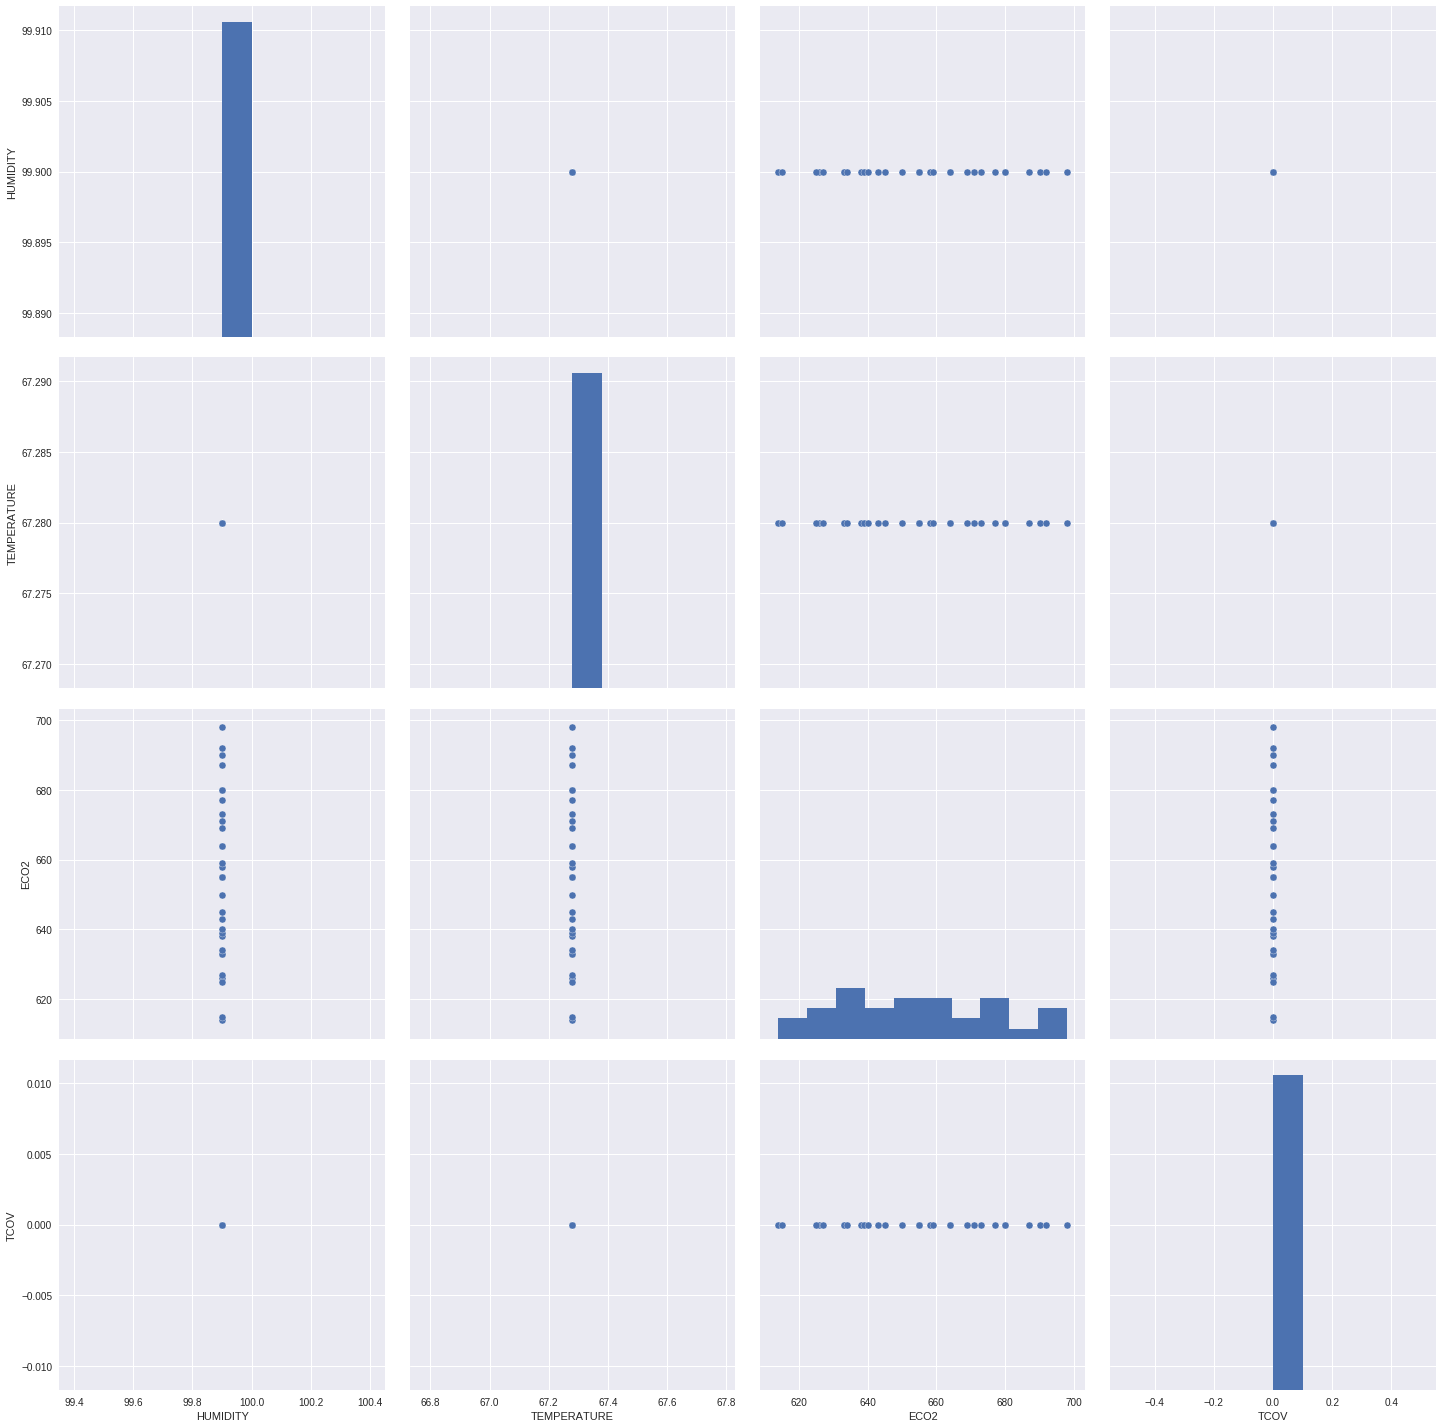

In [0]:
#Check correlations between features
sns.pairplot(raw, size=5)



The "pairplot" (typically called a "scatterplot matrix") allows us to see relationships between all our features. Since we are going to use this data for regression, we might be particularly interested in relationships (in this case correlations) between all features and **MEDV**. At first glance, there could be a relationship between **MEDV** and **RM**, the average number of rooms per home. This makes sense -- a bigger home probably is more expensive. There also seems to be a negative relationship with **MEDV** and **LSTAT**, the percent "lower status" of the population. This also makes sense -- more affluent residents probably live in nicer homes. Anything else of interest?

There are other visualizations than the pairplot and other data qualites of interest like outlier detection, but for the sake of time, let's continue on. Linear regression might allow us to find outliers anyway.

##Your Turn!
Now is you chance to apply EDA on your own data set. Using the **"Admission_Predict.csv"** data set, load it into the notebook and perform some quick EDA utilizing what you learned with the code above. [Here](https://www.kaggle.com/mohansacharya/graduate-admissions/home) is the metadata on the set. When in doubt visit the Python package websites linked above and, of course, every programmer's best friend [StackOverflow](https://stackoverflow.com)!

In [11]:
#Upload the file from your local computer and save it in the Jupyter environment
files.upload()

Saving data_for_plotting.csv to data_for_plotting (1).csv


{'data_for_plotting.csv': b'TIME,HUMIDITY,TEMPERATURE,CO2,TVOC\n11:59:53, 98.0, 91.57999725341797, 400, 616\n11:59:51, 98.0, 91.57999725341797, 400, 603\n11:59:50, 98.0, 91.57999725341797, 400, 609\n15:51:48, 99.9000015258789, 86.0, 400, 262\n11:59:56, 98.0, 91.57999725341797, 400, 601\n11:59:55, 98.0, 91.4, 400, 603\n13:53:54, 99.9000015258789, 79.16000137329101, 400, 183\n15:51:45, 99.9000015258789, 86.18000068664551, 400, 265\n11:59:58, 98.0, 91.57999725341797, 400, 615\n15:51:41, 99.9000015258789, 86.18000068664551, 400, 252\n09:23:47, 99.9000015258789, 68.71999931335449, 400, 146\n09:23:44, 99.9000015258789, 68.71999931335449, 400, 147\n09:23:45, 99.9000015258789, 68.71999931335449, 400, 142\n09:23:42, 99.9000015258789, 68.71999931335449, 400, 138\n09:23:41, 99.9000015258789, 68.71999931335449, 400, 140\n16:30:32, 99.9000015258789, 76.81999931335449, 400, 23\n10:03:41, 99.9000015258789, 69.0800006866455, 1717, 2185\n16:30:37, 99.9000015258789, 76.81999931335449, 400, 12\n09:23:48,

**Load the data file into a Pandas dataframe named "ap"**

In [0]:
htc_data = pd.read_csv("data_for_plotting (1).csv")


**What are the dimensions of this data file?**

In [14]:
htc_data.shape


(39688, 5)

**Describe the data. Are there missing values? If so, how many? Anything that keeps this structured data set from being "tidy?"**

In [17]:
htc_data.describe()





,HUMIDITY,TEMPERATURE,CO2,TVOC
count,39688.000000,39688.000000,39688.000000,39688.000000
mean,99.241830,76.165005,418.153724,210.753931
std,2.487780,8.477456,173.218830,267.343806
min,23.100000,32.720000,400.000000,0.000000
25%,99.900002,69.260001,400.000000,92.000000
50%,99.900002,70.519999,400.000000,138.000000
75%,99.900002,81.500000,400.000000,233.000000
max,99.900002,99.860001,4500.000000,3313.000000


**Take appropriate steps to prepare the data set for analysis and describe what you did.**

In [0]:
time = htc_data[["TIME"]].values
h =htc_data[['HUMIDITY']].values
t = htc_data[['TEMPERATURE']].values
co2 = htc_data[['CO2']].values


plt.plot(time,h)
#, time, t, time, co2)

**What features might be good predictors for "Chance of Admit?" Are there any that have little to no predictive value?**

##Linear Regression

Remember that linear regression is used to take a set of features and try to predict a quantitative outcome, in this case the median price of a home in Boston. Let's do a simple example based on what we saw in our EDA: simple linear regression using the number of rooms to predict the median home value.

In [0]:
#Build and visualize a simple linear regression
X = raw[['RM']].values 
y = raw[['MEDV']].values

lm = LinearRegression()
lm.fit(X, y)

def lin_regplot(X, y, model):
    plt.figure(figsize=(15,10))
    plt.scatter(X, y, c='navy', edgecolor='white', s=55)
    plt.plot(X, model.predict(X), color='black', lw=2.5)
    return None

lin_regplot(X, y, lm)
plt.xlabel('Avg. Rooms')
plt.ylabel('Price in $1,000')
plt.title('Simple Linear Regression: Average Rooms Predicting Median Home Value')
plt.show

As suspected, as the number of rooms increases, so does price on average. However, we also see that there appear to be several outliers so there is potential our model might not be that great. Let's look at the coefficient for **RM** and the **R-squared** statistic which tells us how much variance in the target feature our model explains:

In [0]:
#Check coefficients and R-squared
print(lm.coef_)
print('R-squared =', lm.score(X, y))

The coefficient estimated tells us that for each extra room, the median home price increases by about $9,000. Remember, R-squared is a measure of the total variance our regression line explains divided by the total variation in the data -- a ratio, 0 to 1 calculated as **1-(RSS/TSS)**. Closer to "1" is better so this simple model is just OK.

We can probably do better than this. What happens if we include the rest of our features?

In [0]:
#Multiple linear regression
X = raw.iloc[:, :-1].values 
y = raw['MEDV'].values

mlm = LinearRegression()
mlm.fit(X, y)

print('R-squared =', mlm.score(X, y))

That's quite an improvement! 

The **R-squared** values have increased meaning this model with 13 predictors explains more variation in the price than the model with just the number of rooms. Don't get too excited -- **R-squared** will *always* increase with more features which makes intuitive sense because we are adding additional information. Even if it isn't that predictive, it is still more than we knew without it. The **Adjusted R-squared** is a statistic that penalizes additional predictors in the model and gives a better idea of fit. Investigate on your own!

What features seem to have the biggest influence on **MEDV?**

In [0]:
pd.DataFrame(list(zip(raw.columns[:-1], mlm.coef_)), 
             columns=('Feature','Coefficient'))

Most notably, the presence of Nitric Oxide (**NOX**) seems to significantly impact the **MEDV** negatively. Other features with a negative impact on **MEDV** make intuitive sense as well like Per Capita Crime Rate (**CRIM**) -- higher rates, lower home values.

##Your Turn!
Now is you chance to apply regression analysis on your own data set. The **"Admission_Predict.csv"** data set should already be loaded into the Python object **"ap"** so no need to reload it. 

**First, choose one feature to predict "Chance of Admit". What did you choose and why? Create a linear regression model, plot it, and report the R-squared**

**Now try a multiple linear regression model with all features as predictors. How big is the improvement in fit? Are any features having a greater impact than others?**

##Logistic Regression

Since we already cleaned up the **"HousingData.csv"** data set, let's try and use it for **Logistic Regression** as well. Remember, with this we are trying to estimate the *probability* that an observation belongs to a certain class -- typically something binary that can be represented as "Yes/No" or "Male/Female" or "0/1." We *do* have the **CHAS** feature that is binary but it is highly skewed to "0" which will make a simple demo hard so we will have to make one! 

What if we continue to use the **MEDV** feature as our target but now we create an arbitrary dividing line and call all homes below it "low priced" and all above "high priced?" Let's look again at some summary statisistics to determine where to make the split.

In [0]:
#Check summary statistics
raw.describe()

If we draw an arbitrary line at the 50th percentile, all observations with homes less than $21,200 would be in the "low priced" category and all at or above would be in the "high priced" category. Let's try that out.

In [0]:
#Replace MEDV with 0/1
raw['MEDV'] = np.where(raw['MEDV'] < 21.2, 0, 1)
raw['MEDV'].value_counts()

This has effectively given us an even split. In real life, however, this won't always be the case and sometimes we will need to predict outcomes where the split is highly skewed in one direction.

Remember in logistic regression we are given the **log-odds** for our coefficients because we want to constrain our outcomes to be between 0 and 1 so that we can interpret them as probabilities. In linear regression we make the assumption that our regression line and therefore the data points it models stretch on to infinity in both directions. This makes no sense in the context of probabilities.

Let's start simple like we did with our linear regression example and use **RM** to predict the probability of a low or high priced home.

In [0]:
#Build and visualize a simple logistic regression
X = raw[['RM']].values 
y = raw['MEDV'].values

#Don't worry about the 'C' parameter. 
#It's for what's called 'regularization' which is out of scope for this class
lr = LogisticRegression(C=1e8) 
lr.fit(X, np.ravel(y.astype(int)))

plt.figure(figsize=(15,10))
plt.scatter(X, y, c='navy', edgecolors='white' )
plt.plot(sorted(X), sorted(lr.predict_proba(X)[:,1]), lw=2.5, c='black')
plt.xlabel('Number of Rooms')
plt.ylabel('Probability')
plt.title('Logistic Regression: Probability of High Priced Home Given Rooms')
plt.show()

This is a great plot and easy to understand and draw predictions from, even visually. For instance, we can see that at about 6.25 rooms (remember these are the average number of rooms within the tract) we are on the fence between our home being considered low/high priced. We can also see there are a few homes with 5 or fewer rooms that fall into our "high priced" category.

We can do a few other interesting things with our model's output. Our intercept and coefficient are in **log-odds** and we'd like to convert that to just **odds** and finally **probabilities**. We can do this in both a long form and short form since scikit-learn has a built in function for calculating the probability of a given value based on our model. Let's calculate the probability of having a "high priced" home that has **6** rooms (we can even look at the graph for a visual estimate).

In [0]:
#Estimate probability of "high priced" (long form)
rooms = np.exp(lr.intercept_ + (6 * lr.coef_))
prob = rooms/(1+rooms)
prob

In [0]:
#Estimate probability of "high priced" (short form)
lr.predict_proba(6)[:,1]

The function `predict_proba` calculates the probability of "high priced" given an input value, in this case "6 rooms." What if we'd like to make similar statements like we did with linear regression, mainly: "With a 1 unit increase in X, we can expect an increase in Y of..." With linear regression this is straightforward since we are estimating a straight line with constant slope. Logistic regression, with it's s-shaped line (called a *sigmoid*), our slope *isn't* constant. 

One method for this interpretation is called the "Divide by 4 Rule." Simply put, the rule states that the maximum slope of our sigmoid is approximately at the half-way point (i.e. 50%). We make the *assumption* of zero slope at this point, work through the math, and arrive at **Beta<sub>1</sub>/4** (since our slope most likely *isn't* zero, this is why it's considered a "rough estimate"). Again, since this is considered the *maximum* slope of our sigmoid curve, we consider this probability as an upper limit. The value we calculate is called the **marginal effect**.



In [0]:
#Estimate marginal effect of one room increase on probability of high priced home
add_room = (lr.coef_/4)
add_room

This states: "With an additional room in our home, the probability of the home being "high priced" increases by (at most) **61%**"

We can also see the overall accuracy of our model. "Accuracy" in the machine learning sense means how well can our model predict "True Positives" (i.e. High Priced homes) *and* "True Negatives" (i.e. Low Priced homes) out of all the observations it was modeled on. We'll talk more about model evaluation in a later lab, but for now here is the code:

In [0]:
#Calculate model accuracy
lr.score(X, y)

This states that our model has **74%** accuracy. Not too bad!

##Your Turn!
Now is you chance to apply logistic regression analysis on your own data set. The **"Admission_Predict.csv"** data set should already be loaded into the Python object **"ap"** so no need to reload it. Remember that logistic regression expects a binary target feature so let's perform a similar data transformation to **"Chance to Admit"** like we did with **"MEDV"**.

**Either create a new feature or recode the existing "Chance of Admit" into a binary feature. You can decide where the cutoff threshold should be although the typical default probability is .50 (I chose .73 myself just to balance the target values). What are the frequencies of each group?**

**Fit and plot a logistic regression model using a one predictor feature. What did you choose and why?**

**What is your probability of admission given your TOEFL Score is 108? What about 104 or 112?**

**With a one point increase in TOEFL Score, what is the probability of admission increased by (at most)?**

**What is the overall accuracy of our model?**